<a href="https://colab.research.google.com/github/Taivvf/ML/blob/main/A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Booking Data


---
**Objective:**

In this notebook, we are going to create some visualizations to better explore our dataset and clean it as a next step.


# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

After you download the **hotel_bookings.csv** dataset file, upload it to your runtime so you can work with it.

In [4]:

df = pd.read_csv('/content/hotel_bookings.csv')


# 1. Exploring your data / Diagnosis phase

## 1.1 Question 1: Diagnose data for cleaning

When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.

- .head() returns the first few rows (the “head” of the DataFrame).
- .tail() returns the last few rows (the “tail” of the DataFrame).
- .info() shows information on each of the columns, such as the data type and number of missing values.
- .shape returns the number of rows and columns of the DataFrame.
- .columns: An index of columns: the column names.


In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [6]:
df.tail()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
51385,City Hotel,1,316,2016,May,21,19,0,2,2,...,Non Refund,1.0,NaN,0,Transient,62.0,0.0,0.0,Canceled,2015-10-22
51386,City Hotel,1,316,2016,May,21,19,0,2,2,...,Non Refund,1.0,NaN,0,Transient,62.0,0.0,0.0,Canceled,2015-10-22
51387,City Hotel,1,28,2016,May,21,19,0,2,1,...,No Deposit,NaN,174.0,0,Transient-Party,95.0,0.0,0.0,Canceled,2016-05-04
51388,City Hotel,1,316,2016,May,21,19,0,2,2,...,Non Refund,1.0,NaN,0,Transient,62.0,0.0,0.0,Canceled,2015-10-22
51389,City Hotel,1,316,2016,May,21,19,0,2,2,...,Non Refund,1.0,NaN,0,Transient,62.0,NaN,NaN,NaN,NaN


In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51390 entries, 0 to 51389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           51390 non-null  object 
 1   is_canceled                     51390 non-null  int64  
 2   lead_time                       51390 non-null  int64  
 3   arrival_date_year               51390 non-null  int64  
 4   arrival_date_month              51390 non-null  object 
 5   arrival_date_week_number        51390 non-null  int64  
 6   arrival_date_day_of_month       51390 non-null  int64  
 7   stays_in_weekend_nights         51390 non-null  int64  
 8   stays_in_week_nights            51390 non-null  int64  
 9   adults                          51390 non-null  int64  
 10  children                        51386 non-null  float64
 11  babies                          51390 non-null  int64  
 12  meal                            

In [8]:
df.shape


(51390, 32)

In [9]:
df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

- Missing values in agent, children, country and company columns (We can see that from the non null count)

## 1.2 Exploratory data analysis

### Question 2: Check for missing Values

 Missing data can affect your analysis and models. Determine if any columns have missing values and decide how to handle them.

In [10]:

   # Count of missing values in each column
df.isna().sum().sum()

57381

In [11]:
# max value column
df.isna().sum().idxmax()

'company'

### Explore descriptive statistics

In [12]:
 # Summary statistics for numerical columns
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,51390.000000,51390.000000,51390.000000,51390.000000,51390.000000,51390.000000,51390.000000,51390.000000,51386.000000,51390.000000,51390.000000,51390.000000,51390.000000,51390.000000,42526.000000,3359.000000,51390.000000,51390.000000,51389.000000,51389.000000
mean,0.334326,90.248395,2015.970889,27.226114,15.794999,1.107356,2.925628,1.857696,0.115226,0.011948,0.034598,0.079296,0.114166,0.260226,166.758477,228.532004,2.577778,93.995650,0.110432,0.554146
std,0.471759,93.587831,0.735646,13.941423,8.800665,1.112559,2.316884,0.651861,0.424297,0.117928,0.182762,1.179537,0.886714,0.695096,116.978696,130.298336,17.360154,60.987909,0.318603,0.787426
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,13.000000,2015.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,130.000000,0.000000,56.000000,0.000000,0.000000
50%,0.000000,61.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,223.000000,0.000000,79.000000,0.000000,0.000000
75%,1.000000,141.000000,2017.000000,38.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,308.000000,0.000000,116.745000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,30.000000,20.000000,535.000000,543.000000,259.000000,5400.000000,8.000000,5.000000


### Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

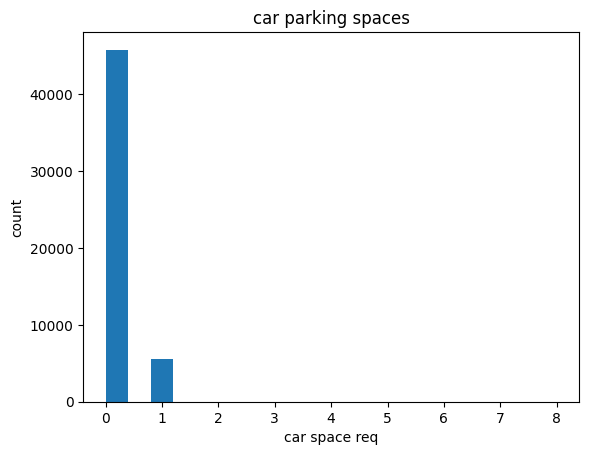

In [13]:
import matplotlib.pyplot as plt

# Histogram for "required_car_parking_spaces" column
plt.hist(df['required_car_parking_spaces'],bins=20)
plt.title('car parking spaces')
plt.xlabel("car space req")
plt.ylabel("count")
plt.show


Text(0, 0.5, 'count')

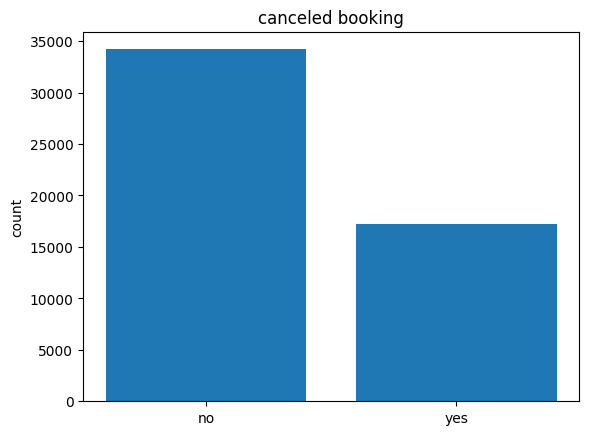

In [14]:

# Bar plot for "is_canceled" column
plt.bar(['no','yes'],df['is_canceled'].value_counts())
plt.title('canceled booking')
plt.ylabel('count')


## 1.3 Cleaning

### Handling Missing Values

In [15]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Option 1: Remove rows with missing values
df_copy_dropped = df_copy.dropna()



# Option 2: Impute missing values
# Fill missing values with a specific value
df_copy_filled = df_copy.fillna(0)



# Fill missing values with the mean value of the column
#df_copy_mean = df_copy.fillna(df_copy.mean())
df_copy_mean=df_copy.fillna(df.mean)



# Option 3: Drop columns with excessive missing data
# Set a threshold for the percentage of missing values in a column
threshold = 0.5  # Example threshold of 50%
df_copy_dropped_cols = df_copy.dropna(thresh=threshold*len(df_copy), axis=1)

# Print the modified DataFrames
print("DataFrame with dropped rows:\n", df_copy_dropped)
print("DataFrame with filled missing values:\n", df_copy_filled)
print("DataFrame with filled missing values using mean:\n", df_copy_mean)


DataFrame with dropped rows:
               hotel  is_canceled  lead_time  arrival_date_year  \
2392   Resort Hotel            0          6               2015   
2697   Resort Hotel            0         24               2015   
2867   Resort Hotel            0         24               2015   
2877   Resort Hotel            0         24               2015   
2878   Resort Hotel            0         24               2015   
...             ...          ...        ...                ...   
41142    City Hotel            0          0               2015   
41144    City Hotel            0          0               2015   
42126    City Hotel            0          1               2015   
43580    City Hotel            0         19               2015   
46695    City Hotel            1          1               2016   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
2392             October                        42                         11   
2697           

### Data Types

Check Unique Values for df column to know whether column type is correct or not

In [16]:
for i in df.columns:
    x = df[i].value_counts()
    print("Column name ",i," has different values of:",len(x))

Column name  hotel  has different values of: 2
Column name  is_canceled  has different values of: 2
Column name  lead_time  has different values of: 415
Column name  arrival_date_year  has different values of: 3
Column name  arrival_date_month  has different values of: 12
Column name  arrival_date_week_number  has different values of: 53
Column name  arrival_date_day_of_month  has different values of: 31
Column name  stays_in_weekend_nights  has different values of: 16
Column name  stays_in_week_nights  has different values of: 32
Column name  adults  has different values of: 14
Column name  children  has different values of: 5
Column name  babies  has different values of: 4
Column name  meal  has different values of: 5
Column name  country  has different values of: 136
Column name  market_segment  has different values of: 8
Column name  distribution_channel  has different values of: 5
Column name  is_repeated_guest  has different values of: 2
Column name  previous_cancellations  has d

According to the unqiue values per each column the following columns should be change to
1. **categorical columns:**   mealType, country,market_segment,distribution_channel,reserved_room_type, assigned_room_type, customer_type,reservation_status,arrival_date_month, hotel, arrival_date_year
2. **boolean:** is_canceled, is_repeated_guest
3. **int:** children, agent, company, ...
4. **date:** reservation_status_date

After knowing which columns represent categorical data, let's see the counts of each value in these columns

In [17]:
df_cat=df[['hotel','is_canceled','arrival_date_month','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status']]

for i in df_cat.columns:
    x = df_cat[i].value_counts()
    print("Column name is:",i,"and its value counts are:")
    print(x)
    print()

Column name is: hotel and its value counts are:
hotel
Resort Hotel    40060
City Hotel      11330
Name: count, dtype: int64

Column name is: is_canceled and its value counts are:
is_canceled
0    34209
1    17181
Name: count, dtype: int64

Column name is: arrival_date_month and its value counts are:
arrival_date_month
August       6472
April        5184
September    5116
July         5073
October      4937
May          4505
March        4492
February     3830
December     3121
June         3045
November     2857
January      2758
Name: count, dtype: int64

Column name is: meal and its value counts are:
meal
BB           38799
HB            9692
Undefined     1169
SC             940
FB             790
Name: count, dtype: int64

Column name is: country and its value counts are:
country
PRT    23542
GBR     7156
ESP     4934
FRA     2511
IRL     2252
       ...  
MKD        1
BHR        1
SYC        1
GGY        1
BDI        1
Name: count, Length: 136, dtype: int64

Column name is: market

The *category data type* in Python will continue to look like a string character to us and in many places will behave like a string (or object) type; however, it is internally being represented by integer values, unique to each category.

Question 6: Here's how we change to the category dtype

In [18]:
df_cat = df_cat.astype("category")



Below, we confirm that the dtype has changed to category:

In [19]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51390 entries, 0 to 51389
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   hotel                 51390 non-null  category
 1   is_canceled           51390 non-null  category
 2   arrival_date_month    51390 non-null  category
 3   meal                  51390 non-null  category
 4   country               50912 non-null  category
 5   market_segment        51390 non-null  category
 6   distribution_channel  51390 non-null  category
 7   is_repeated_guest     51390 non-null  category
 8   reserved_room_type    51390 non-null  category
 9   assigned_room_type    51390 non-null  category
 10  deposit_type          51390 non-null  category
 11  customer_type         51390 non-null  category
 12  reservation_status    51389 non-null  category
dtypes: category(13)
memory usage: 710.6 KB


## 1.4 Feature Correlation

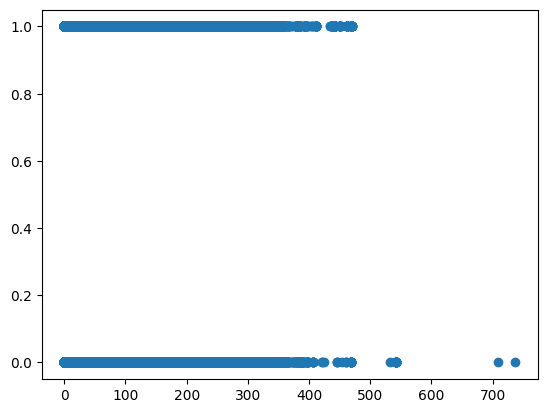

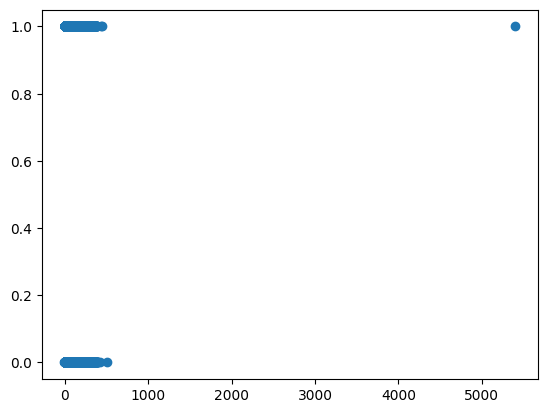

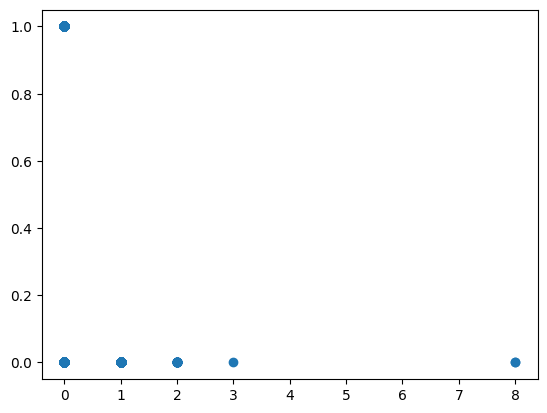

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
# Select the columns of interest
columns_of_interest = ['lead_time', 'adr', 'required_car_parking_spaces']

# Scatter plots
for i in columns_of_interest:
  plt.scatter(df[i], df['is_canceled'])
  plt.show()




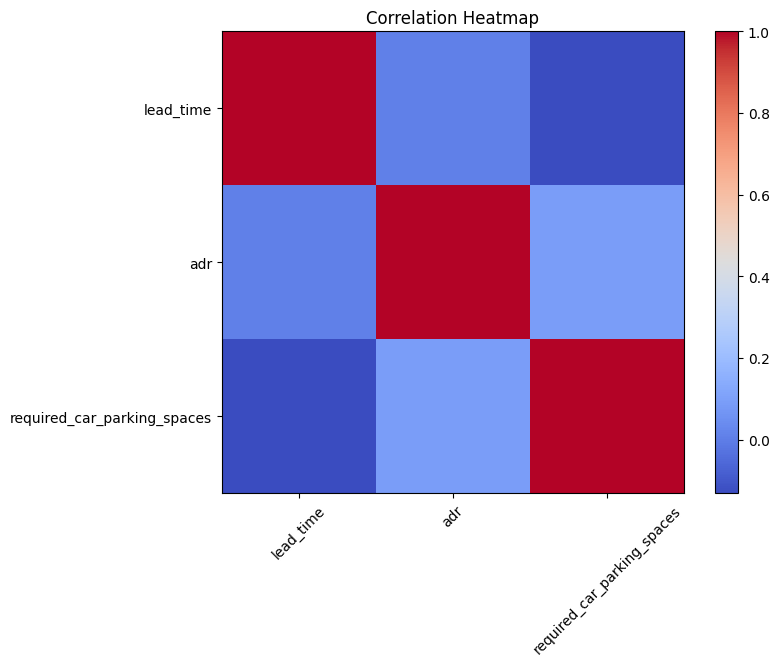

In [21]:

# Correlation heatmap

correlation_matrix = df[columns_of_interest].corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
tick_marks = range(len(columns_of_interest))
plt.xticks(tick_marks, columns_of_interest, rotation=45)
plt.yticks(tick_marks, columns_of_interest)
plt.title('Correlation Heatmap')
plt.show()